<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логическая-регрессия" data-toc-modified-id="Логическая-регрессия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Логическая регрессия</a></span></li><li><span><a href="#Лучшая-модель" data-toc-modified-id="Лучшая-модель-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Лучшая модель</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

In [1]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\tazts\anaconda3\lib\site-packages (0.8.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE # важно до sklearn
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import time
import timeit
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve 
from sklearn.metrics import make_scorer

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Отток клиентов

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [3]:
df = pd.read_csv('C:/Users/tazts/Downloads/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<b>Признаки</b>
*	RowNumber — индекс строки в данных
*	CustomerId — уникальный идентификатор клиента
*	Surname — фамилия
*	CreditScore — кредитный рейтинг
*	Geography — страна проживания
*	Gender — пол
*	Age — возраст
*	Tenure — сколько лет человек является клиентом банка
*	Balance — баланс на счёте
*	NumOfProducts — количество продуктов банка, используемых клиентом
*	HasCrCard — наличие кредитной карты
*	IsActiveMember — активность клиента
*	EstimatedSalary — предполагаемая зарплата

<b>Целевой признак</b>

*	Exited — факт ухода клиента


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Пропуски наблюдаются только в столбце Tenure. Проверим, может отсутствие значения означает 0 лет.

In [5]:
df.Tenure.value_counts(dropna = False)

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

0 лет и так есть такое значение. А неизвестных 10%. Не будем их откидывать, а придадим ей необычный признак -1, которая отличит эти данные от известных и придаст им особое значение (может быть клиенты банка более 10 лет и тогда не вели учет, может быть ошибка передачи данных)

In [6]:
df.Tenure=df.Tenure.fillna(-1)

Проверим, нет ли не уникальных клиентов

In [7]:
len(df.CustomerId.unique())

10000

Таких не имеется. Уберем незначащие столбцы: RowNumber — индекс строки в данных, CustomerId — уникальный идентификатор клиента, Surname — фамилия. На их основе нейросеть не сможет вывести никаких закономерностей

In [8]:
df = df.drop(['RowNumber','CustomerId', 'Surname'],axis=1)

Посмотрим, сильно ли различаются истории уходов клиентов в разных регионах.

In [9]:
df.groupby('Geography')['Exited'].value_counts(dropna = False)

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

Разный процент ухода, значит регион значим, и эту информацию нельзя удалять. Посмотрим на половой признак.

In [10]:
df.groupby('Gender')['Exited'].value_counts(dropna = False)

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

Похоже и влияние гендера и страны проживания довольно сильно, поэтому их стоит сохранить.

Оценим мультиколлинеарность признаков. Найдем коэффициенты корреляции и построим диаграммы рассеивания. После этого нужно принять решение о включении в модель признаков.


Матрица диаграмм рассеяния и таблица корреляции 1: зависимость признаков друг от друга


,CreditScore,Tenure,Age,Balance,EstimatedSalary
CreditScore,1.000000,0.000842,-0.003965,0.006268,-0.001384
Tenure,0.000842,1.000000,-0.009997,-0.012254,0.007784
Age,-0.003965,-0.009997,1.000000,0.028308,-0.007201
Balance,0.006268,-0.012254,0.028308,1.000000,0.012797
EstimatedSalary,-0.001384,0.007784,-0.007201,0.012797,1.000000


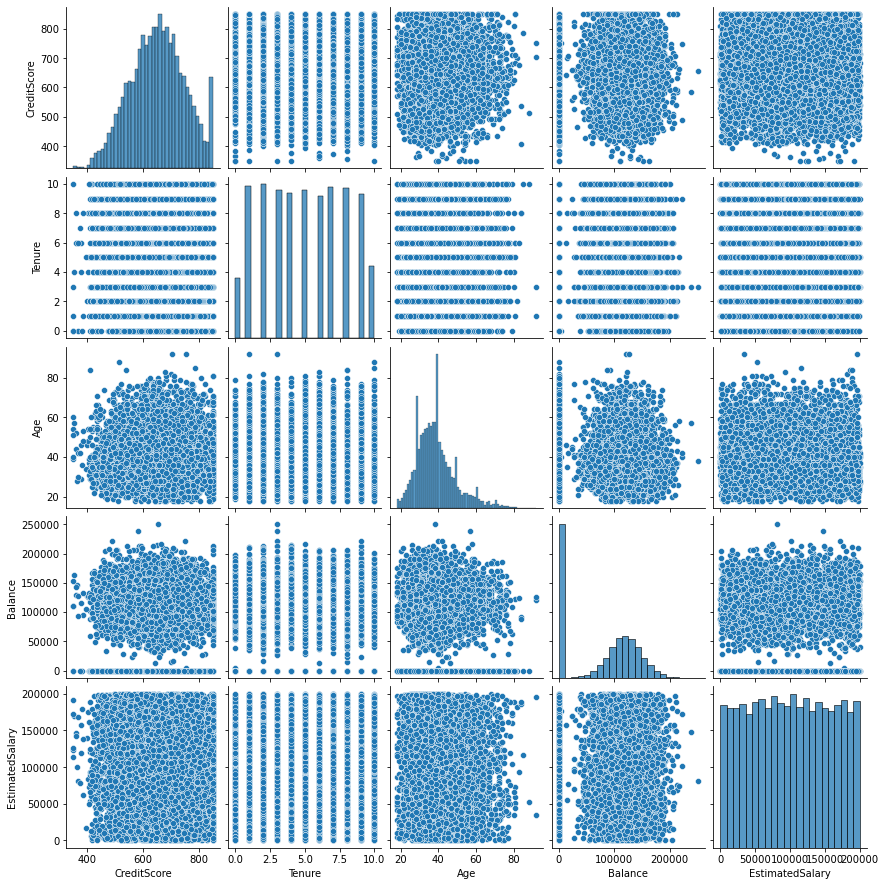

In [11]:
m = 1
print(f'Матрица диаграмм рассеяния и таблица корреляции {m}: зависимость признаков друг от друга')
sns_plot = sns.pairplot(df[['CreditScore', 'Tenure','Age', 'Balance', 'EstimatedSalary']])
sns_plot.savefig('pairplot.png')
cm = sns.light_palette("green", as_cmap=True)
s = pd.DataFrame(df[['CreditScore', 'Tenure','Age', 'Balance', 'EstimatedSalary']].corr()).style.background_gradient(cmap=cm)
display(s)




Из проделанной операции мы сделали 2 вывода: численные данные не коррелируют друг с другом на прямую. Баланс имеет выброс в значении 0 - но это может быть правдой, так как разные цели открытия банковских карт. Составим 2 таблицы с ним и без него - посмотрим, с какими данным модель удет лучше предсказывать.

Следующим шагом преобразуем категориальные признаки в численные с помощью техники прямого кодирования, или отображения (англ. One-Hot Encoding, OHE).


In [12]:
df_dummies = pd.get_dummies(df,drop_first=True)
df_dummies

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [13]:
target = df_dummies['Exited']
features = df_dummies.drop('Exited', axis=1)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

features_nonbalance = df_dummies.drop(['Exited','Balance'], axis=1)
features_train_nonbalance, features_test_nonbalance, target_train_nonbalance, target_test_nonbalance = train_test_split(
    features_nonbalance, target, test_size=0.25, random_state=12345)

## 	Исследование задачи

У наших признаков разный масштаб (например возраст и зарплата). Необходимо применить масштабирование.
Один из методов масштабирования — стандартизации данных. Посмотрим на метрику F1 без масштабирования

In [14]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))

F1: 0.10784313725490195


In [15]:
numeric  = ['CreditScore','Age','Tenure','Balance','NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric]) 

numeric  = ['CreditScore','Age','Tenure','NumOfProducts', 'EstimatedSalary']
scaler_nonbalance = StandardScaler()
scaler_nonbalance.fit(features_train_nonbalance[numeric])
features_train_nonbalance[numeric] = scaler_nonbalance.transform(features_train_nonbalance[numeric])
features_test_nonbalance[numeric] = scaler_nonbalance.transform(features_test_nonbalance[numeric]) 

In [16]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))

F1: 0.29650349650349644


In [17]:
model = LogisticRegression(random_state=12345)
model.fit(features_train_nonbalance, target_train_nonbalance)
predicted_test_nonbalance = model.predict(features_test_nonbalance)
print("F1:", f1_score(target_test_nonbalance, predicted_test_nonbalance))

F1: 0.2937062937062937


### Вывод
Масштабированные данные дали лучшую предсказательность - примерно в 3 раза. Использование данных без признака баланса незначительно улучшило эту метрику - попробуем на лучшей моделе применить этот метод.

## Борьба с дисбалансом

In [18]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [19]:
df.Exited.value_counts()[0]/df.Exited.value_counts()[1]

3.9091801669121256

Ушедших в 4 раза меньше, чем оставшихся. Классы не сбалансированы. Для балансировки используем специальный метод увеличения числа примеров миноритарного класса – алгоритм SMOTE (Synthetic Minority Oversampling Technique). При этом напишем класс, в который будет передаваться модель, чтобы использовать SMOTE при перекрестной проверке.

In [20]:
class UpsampledClassifier(BaseEstimator):
    def __init__(self, model, threshold):
        self.model = model
        self.smoter = SMOTE(random_state=42)
        self.threshold = threshold 
 
    def fit(self, X, y=None):
        X_train_upsample, y_train_upsample = self.smoter.fit_resample(X, y)
        self.model.fit(X_train_upsample, y_train_upsample)
        return self
 
    def predict(self, X, y=None):
        return self.model.predict_proba(X) > self.threshold
 
    def predict_proba(self, X, y=None):
        return self.model.predict_proba(X)

## Тестирование модели

### Решающее дерево
Найдем лучшие параметры и посмотрим метрику F1

In [29]:
model_tree = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
parametrs = { 'max_depth': range (10,51,2) }
grid_tree = GridSearchCV(model_tree, parametrs, cv=5,scoring=make_scorer(f1_score, average = 'macro'))

my_classifier_tree = UpsampledClassifier(model=grid_tree,threshold=2)

my_classifier_tree.fit(features_train, target_train)
grid_tree.best_params_

{'max_depth': 20}

In [31]:
model_tree = DecisionTreeClassifier(random_state=12345, max_depth=20, class_weight='balanced')
my_classifier_tree = UpsampledClassifier(model=model_tree,threshold=2)
%timeit my_classifier_tree.fit(features_train, target_train)
model_tree_predictions = model_tree.predict(features_test)
score_tree = model_tree.score(features_test,target_test)

print("F1:", f1_score(target_test, model_tree_predictions, average = 'macro'))

173 ms ± 3.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
F1: 0.6768021512048816


### Случайный лес
Найдем лучшие параметры и посмотрим метрику F1

In [32]:
model_forest = RandomForestClassifier(random_state=12345, class_weight='balanced')
parametrs = { 'max_depth': range (3,51,2), 'n_estimators': range (5,101,5)}
grid_forest = GridSearchCV(model_forest, parametrs, cv=5,scoring=make_scorer(f1_score, average = 'macro'))

my_classifier_forest = UpsampledClassifier(model=grid_forest,threshold=2)

my_classifier_forest.fit(features_train, target_train)
grid_forest.best_params_

{'max_depth': 31, 'n_estimators': 100}

In [33]:
model_forest = RandomForestClassifier(random_state=12345, max_depth=31, n_estimators=100, class_weight='balanced')
my_classifier_forest = UpsampledClassifier(model=model_forest,threshold=2)
%timeit my_classifier_forest.fit(features_train, target_train)
model_forest_predictions = model_forest.predict(features_test)

print("F1:", f1_score(target_test, model_forest_predictions, average = 'macro'))

1.84 s ± 30.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
F1: 0.7539622796175204


### Логическая регрессия
Найдем лучшие параметры и посмотрим метрику F1

In [34]:
model_lr =LogisticRegression(random_state=12345)
parametrs = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]} 
grid_lr = GridSearchCV(model_lr, parametrs,cv=5,scoring=make_scorer(f1_score, average = 'macro'))
my_classifier_lr = UpsampledClassifier(model=grid_lr,threshold=2)

my_classifier_lr.fit(features_train, target_train)
grid_lr.best_params_

C:\Users\tazts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tazts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tazts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tazts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

{'C': 0.001, 'penalty': 'l2'}

In [36]:
model_lr =LogisticRegression(random_state=12345, penalty = 'l2', C = 0.001, class_weight='balanced')
my_classifier_lr = UpsampledClassifier(model=model_lr,threshold=2)
%timeit my_classifier_lr.fit(features_train, target_train)
model_lr_predictions = model_lr.predict(features_test)
score_lr = model_lr.score(features_test, target_test)

print("F1:", f1_score(target_test, model_lr_predictions, average = 'macro'))

91.2 ms ± 4.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
F1: 0.6551900211111743


### Лучшая модель
Лучшей моделью оказался решающий лес. Попробуем его обучить на признаках без учета баланса.

In [37]:
model_forest = RandomForestClassifier(random_state=12345, class_weight='balanced')
parametrs = { 'max_depth': range (21,51,2), 'n_estimators': range (50,101,10)}
grid_forest = GridSearchCV(model_forest, parametrs, cv=5,scoring=make_scorer(f1_score, average = 'macro'))

my_classifier_forest = UpsampledClassifier(model=grid_forest,threshold=2)

my_classifier_forest.fit(features_train_nonbalance, target_train_nonbalance)
grid_forest.best_params_

{'max_depth': 25, 'n_estimators': 90}

In [39]:
model_forest = RandomForestClassifier(random_state=12345, max_depth=25, n_estimators=90, class_weight='balanced')
my_classifier_forest = UpsampledClassifier(model=model_forest,threshold=2)
%timeit my_classifier_forest.fit(features_train_nonbalance, target_train)
model_forest_predictions = model_forest.predict(features_test_nonbalance)

print("F1:", f1_score(target_test, model_forest_predictions, average = 'macro'))

1.63 s ± 211 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
F1: 0.7441511029239465


Без учета баланса она оказалась похуже. Оставим баланс. Расчитаем метрик AUC-ROC и постороим график.

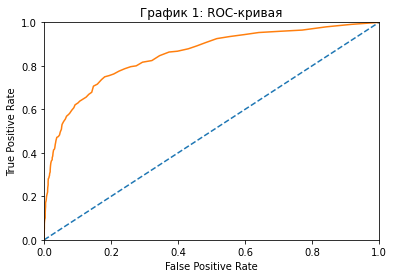

0.7428265677391739


In [40]:
model_forest = RandomForestClassifier(random_state=12345, max_depth=31, n_estimators=100, class_weight='balanced')
model_forest.fit(features_train, target_train)


auc_roc = roc_auc_score(target_test,model_forest_predictions)

probabilities_test = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]


fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('График 1: ROC-кривая')
plt.show()
print(auc_roc)

## Вывод

Для решения задачи мы отбросили ненужные нам неинформативные признаки, а так же признак баланс на счету. Мы сбалансировали данные путем взвешивания классов и SMOTE, привели категориальные признаки в численные с помощью техники прямого кодирования. Проверили 3 модели: решающее дерево, случайный лес и логическая регрессия. Наиболее точной моделью оказался "случайный лес", его метрика F1 - 0,75, AUC-ROC - 0,74. 